In [1]:
import pandas as pd
import seaborn as sns
import regex as re
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import sklearn
import imblearn
import scipy
import PIL
import wordcloud
import matplotlib
from PIL import Image
from scipy.sparse import hstack
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from sklearn.model_selection import GridSearchCV
from nltk.tokenize import TweetTokenizer 
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split,StratifiedKFold,RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion, make_union
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import roc_auc_score
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud ,STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanshsethi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shivanshsethi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
print('pandas', pd.__version__)
print('numpy', np.__version__)
print('sklearn',sklearn.__version__)
print('regex',re.__version__)
print('scipy',scipy.__version__)
print('nltk',nltk.__version__)
print('imblearn',imblearn.__version__)
print('wordcloud',wordcloud.__version__)
print('PIL',PIL.__version__)
print('seaborn',sns.__version__)
print('matplotlib',matplotlib.__version__)

pandas 1.1.5
numpy 1.21.2
sklearn 0.24.2
regex 2.5.109
scipy 1.5.4
nltk 3.6.5
imblearn 0.8.0
wordcloud 1.8.1
PIL 8.0.1
seaborn 0.11.0
matplotlib 3.3.3


In [3]:
url_train = 'https://raw.githubusercontent.com/Sukhamjot-Singh/whysoharsh/main/train.csv'
url_test = 'https://raw.githubusercontent.com/Sukhamjot-Singh/whysoharsh/main/test.csv'
test = pd.read_csv(url_test)
test_id = test['id'].to_numpy()
df = pd.read_csv(url_train)
df.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)

In [4]:
df.head()

,text,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,New Main Picture \n\nHow about this for the ma...,0,0,0,0,0,0
1,Think of them like population charts. Just bec...,0,0,0,0,0,0
2,This page seems a little misleading. The reaso...,0,0,0,0,0,0
3,"""\n\nActually, accounts are never deleted. """,0,0,0,0,0,0
4,"""\n\nYeah yeah, OK. So did I. Still, what I ...",0,0,0,0,0,0


# Checking for NULL Values

In [5]:
df.isnull().sum()

text               0
harsh              0
extremely_harsh    0
vulgar             0
threatening        0
disrespect         0
targeted_hate      0
dtype: int64

# Checking for unlabeled data

In [6]:
all_0 = df[(df['harsh']!=1) & (df['extremely_harsh']!=1) & (df['threatening']!=1) & (df['vulgar']!=1) & (df['disrespect']!=1) & (df['targeted_hate']!=1)]
print('Percentage of unlabelled comments is ', len(all_0)/len(df)*100)

Percentage of unlabelled comments is  89.84458231497149


In [7]:
cols_target = df.columns[-6:]
print(df[cols_target].sum())

harsh              12227
extremely_harsh     1310
vulgar              6772
threatening          383
disrespect          6278
targeted_hate       1147
dtype: int64


# Adding Numerical Features

In [8]:
rowsums=df.iloc[:,2:].sum(axis=1)
df['clean'] = rowsums
df['clean'] = df['clean'].apply(lambda x : 1 if x == 0 else 0)
#length of whole Comment
df['comment_length'] = df['text'].apply(lambda x: len(str(x)))
#Sentence count in each comment:
df['count_sent']=df["text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
df['count_word']=df["text"].apply(lambda x: len(str(x).split()))
#Unique word count
df['count_unique_word']=df["text"].apply(lambda x: len(set(str(x).split())))
#punctuation count
df["count_punctuations"] =df["text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
df["count_words_upper"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

rowsums=test.iloc[:,2:].sum(axis=1)
test['clean'] = rowsums
test['clean'] = test['clean'].apply(lambda x : 1 if x == 0 else 0)
#length of whole Comment
test['comment_length'] = test['text'].apply(lambda x: len(str(x)))
#Sentence count in each comment:
test['count_sent']=test["text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
test['count_word']=test["text"].apply(lambda x: len(str(x).split()))
#Unique word count
test['count_unique_word']=test["text"].apply(lambda x: len(set(str(x).split())))
#punctuation count
test["count_punctuations"] =test["text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
test["count_words_upper"] = test["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# EDA

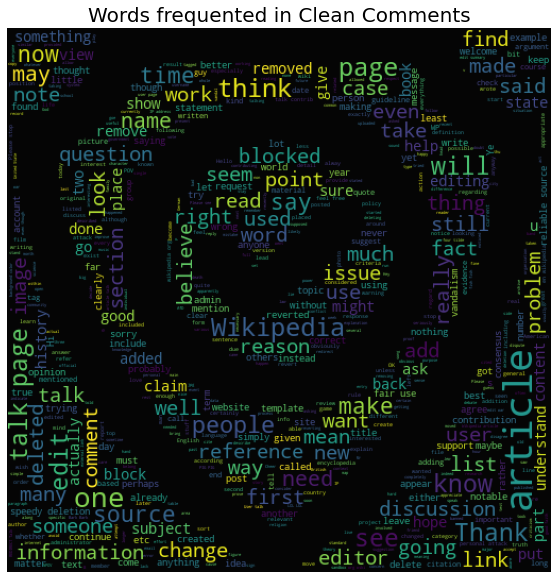

In [9]:
#clean
stopword=set(STOPWORDS)
clean_mask=np.array(Image.open("images/clean.png"))
clean_mask=clean_mask[:,:,1]
subset=df[df.clean==True]
text=subset.text.values
wc= WordCloud(background_color="black",max_words=2000,mask=clean_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Clean Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

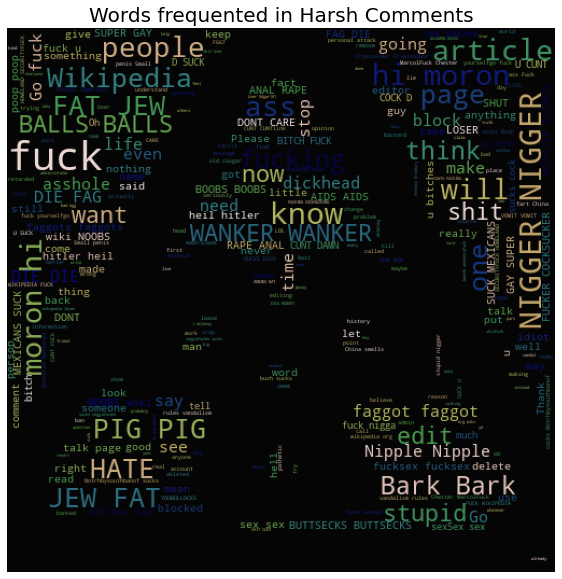

In [34]:
#harsh
toxic_mask=np.array(Image.open("images/harsh.png"))
toxic_mask=toxic_mask[:,:,1]
subset=df[df.harsh==1]
text=subset.text.values
wc= WordCloud(background_color="black",max_words=4000,mask=toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Harsh Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

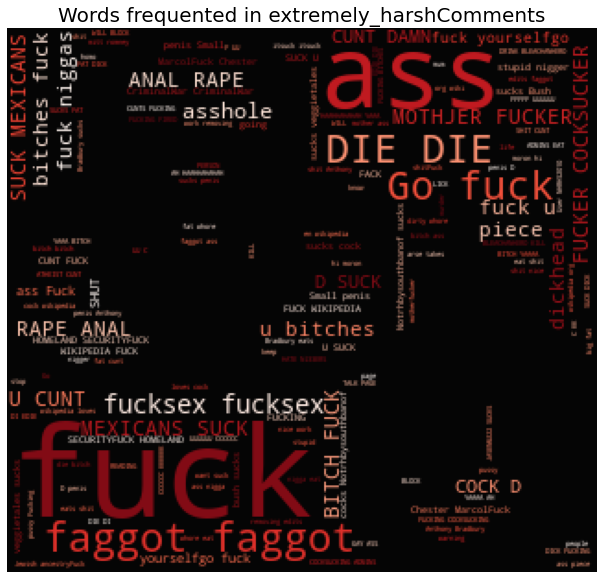

In [35]:
#Severely extremely_harsh comments
severe_toxic_mask=np.array(Image.open("images/extremely_harsh.png"))
severe_toxic_mask=severe_toxic_mask[:,:,1]
subset=df[df.extremely_harsh==1]
text=subset.text.values
wc= WordCloud(background_color="black",max_words=2000,mask=severe_toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in extremely_harshComments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)
plt.show()

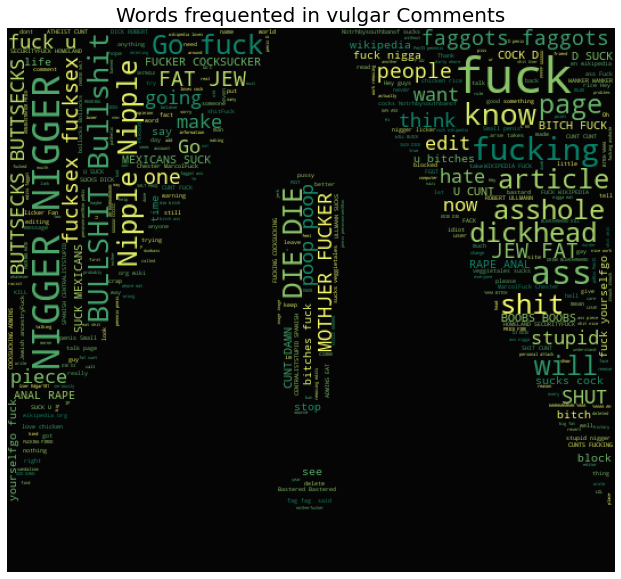

In [36]:
#vulgar comments
threat_mask=np.array(Image.open("images/vulgar.png"))
threat_mask=threat_mask[:,:,1]
subset=df[df.vulgar==1]
text=subset.text.values
wc= WordCloud(background_color="black",max_words=2000,mask=threat_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in vulgar Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'summer' , random_state=2534), alpha=0.98)
plt.show()

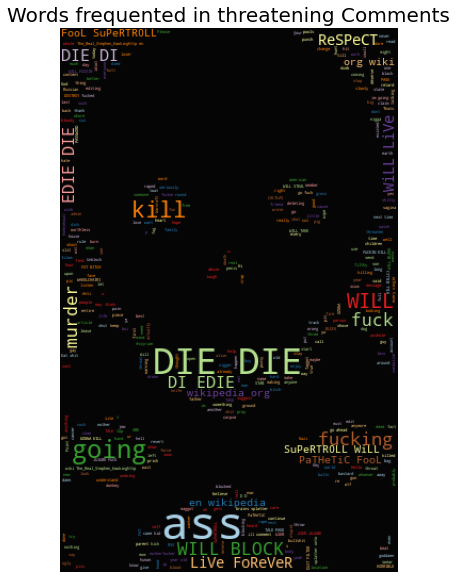

In [42]:
#threatening
insult_mask=np.array(Image.open("images/threatening.png"))
insult_mask=insult_mask[:,:,1]
subset=df[df.threatening==1]
text=subset.text.values
wc= WordCloud(background_color="black",max_words=2000,mask=insult_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in threatening Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
plt.show()

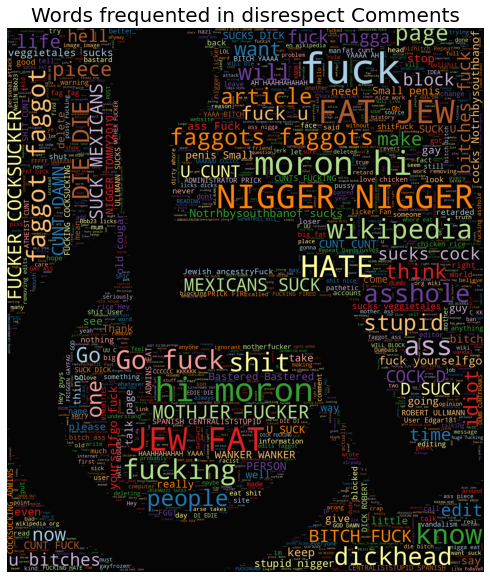

In [43]:
#disrespect
insult_mask=np.array(Image.open("images/disrespect.png"))
insult_mask=insult_mask[:,:,1]
subset=df[df.disrespect==1]
text=subset.text.values
wc= WordCloud(background_color="black",max_words=2000,mask=insult_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in disrespect Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
plt.show()

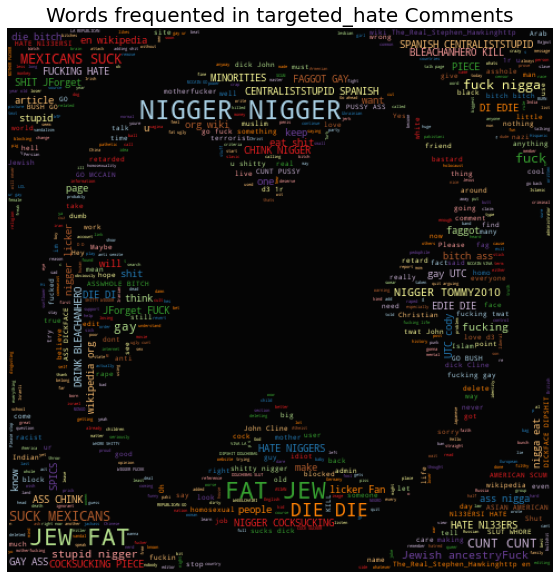

In [44]:
#targeted_hate
insult_mask=np.array(Image.open("images/hate.png"))
insult_mask=insult_mask[:,:,1]
subset=df[df.targeted_hate==1]
text=subset.text.values
wc= WordCloud(background_color="black",max_words=2000,mask=insult_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in targeted_hate Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
plt.show()

<AxesSubplot:>

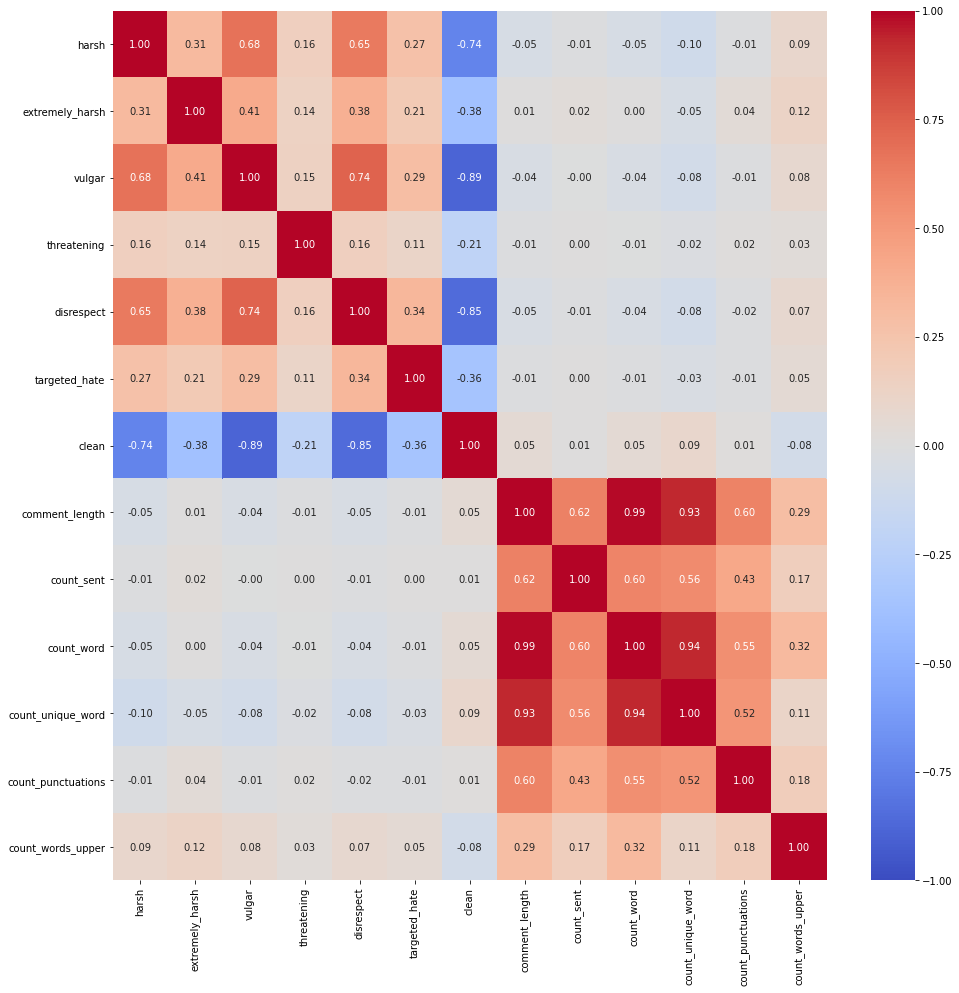

In [45]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')

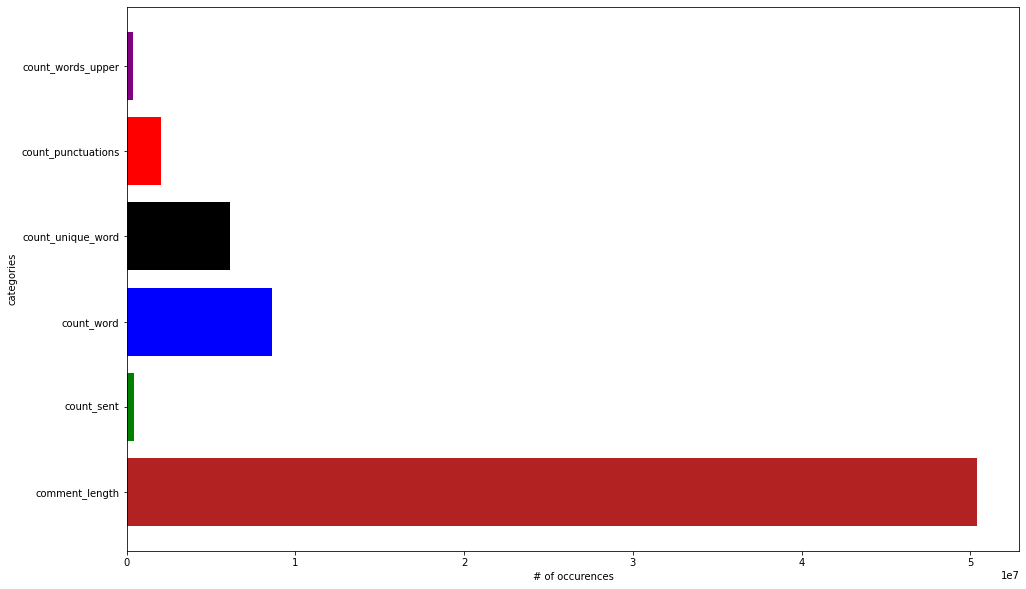

In [63]:
plt.figure(figsize=(16,10))
plt.barh(['comment_length', 'count_sent', 'count_word', 'count_unique_word', 'count_punctuations', 'count_words_upper'], [df['comment_length'].sum(), df['count_sent'].sum(), df['count_word'].sum(), df['count_unique_word'].sum(), df['count_punctuations'].sum(), df['count_words_upper'].sum()], color=['firebrick', 'green', 'blue', 'black', 'red',
                    'purple', 'seagreen', 'skyblue', 'black', 'tomato'])
plt.xlabel("# of occurences")
plt.ylabel("categories")
plt.show()

# Cleaning The Text Data

In [47]:
eng_stopwords = set(stopwords.words("english"))
tokenizer=TweetTokenizer()
lem = WordNetLemmatizer()
stemmer = SnowballStemmer("english")
collection = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}
def clean(comment):
  
  comment=comment.lower()
  comment=re.sub("\\n","",comment) # removing \n
  comment=re.sub("\[\[.*\]","",comment) #removing txt in brackets
  comment = re.sub("\[\[User.*",'',comment) #removing usernames
  comment= re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',comment) #removing ip addresses if any
  comment= re.sub("(http://.*?\s)|(http://.*)",'',comment) #removing web addresess if any
  comment = re.sub("[^a-zA-Z0-9 \n\.]",'',comment) #removing numbers
  comment = re.sub("^\d+\s|\s\d+\s|\s\d+$",'',comment) #removing dates if any
  words=tokenizer.tokenize(comment)

  words=[collection[word] if word in collection else word for word in words] # converting word of the form in the above collection 

  words = [lem.lemmatize(word, "v") for word in words] # lemmatizing
  # words = [stemmer.stem(word) for word in words] # stemming

  words = [w for w in words if not w in eng_stopwords] # removing stopwords from text
  
  clean_sent=" ".join(words)

  return(clean_sent)

In [48]:
df['text'] = df['text'].apply(lambda x : clean(x))
test['text'] = test['text'].apply(lambda x : clean(x))

# Defining Target Classes

In [51]:
target = ['harsh', 'targeted_hate', 'extremely_harsh', 'vulgar', 'threatening', 'disrespect']
y = df[target]
X = df.drop(target, axis=1)
X.drop(['clean'], axis=1, inplace=True)
test.drop(['clean'], axis=1, inplace=True)

In [52]:
X.shape

(127656, 7)

# Seperating Numerical Features and Text Features

In [53]:
num_features = []
char_features = []
for x in X.columns:
    if(X[x].dtypes == object):
        char_features.append(x)
    else:
        num_features.append(x)

print(num_features)
print(char_features)

['comment_length', 'count_sent', 'count_word', 'count_unique_word', 'count_punctuations', 'count_words_upper']
['text']


# Vectorizing Text Feature and Scaling Numerical Features

In [54]:
word_vectorizer = TfidfVectorizer(
        sublinear_tf=True,
        strip_accents='unicode',
        tokenizer=lambda x: re.findall(r'[^\p{P}\W]+', x),
        analyzer='word',
        token_pattern='(?u)\\b\\w\\w+\\b\\w{,1}',
        min_df=5,
        norm='l2',
        ngram_range=(1, 1),
        max_features=20000)
scaler = StandardScaler()

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    token_pattern=None,
    min_df=5,
    ngram_range=(2, 4),
    max_features=20000)
scaler = StandardScaler() #standard Scaler for scaling Numerical Data

vectorizer = make_union(word_vectorizer, char_vectorizer) # union of word and char vectorizer

charx_data= X[char_features]
wordx_data = X[char_features]
numx_data = X[num_features]
chart_data = test[char_features]
wordt_data = test[char_features]
numt_data= test[num_features]

numx_data = scaler.fit_transform(numx_data)
numt_data = scaler.transform(numt_data)

X_encoded = hstack((vectorizer.fit_transform(charx_data.to_numpy().ravel()), numx_data))
test_encoded = hstack((vectorizer.transform(chart_data.to_numpy().ravel()), numt_data))

# count_vectorizer = CountVectorizer()
# X_encoded = hstack((count_vectorizer.fit_transform(charx_data.to_numpy().ravel()), numx_data))
# test_encoded = hstack((count_vectorizer.transform(chart_data.to_numpy().ravel()), numt_data))

In [55]:
print(X_encoded.shape)
print(test_encoded.shape)

(127656, 40006)
(31915, 40006)


# Tested TruncatesSVD for reducing Dimention of Data

In [56]:
# pca = TruncatedSVD(n_components=60000)
# X_final = pca.fit_transform(X_encoded)
# test_final= pca.transform(test_encoded)

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X_encoded, y , random_state=0, shuffle=True)

# Top Approaches are in below cell

In [58]:
predict_dic = {}
predict_dic['id'] = test_id
overall_score = []
for x in target:
  class_column = y[x].values
  score = 0

  # 2nd Best Approach
  # model = GridSearchCV(
  #   RidgeClassifier(n_jobs=-1, random_state=0),
  #   param_grid={'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
  # )
  # model.fit(X_encoded,y[x])
  # d = model.decision_function(X_valid)
  # probs = np.exp(d) / np.sum(np.exp(d))
  # score = roc_auc_score(y_valid[x],probs)
  # d_test = model.decision_function(test_encoded)
  # probs_test = np.exp(d_test) / np.sum(np.exp(d_test))
  # predict_dic[x] = probs_test.tolist()

  #3rd Best Approach
  # model = GridSearchCV(LogisticRegression(n_jobs=-1,random_state=0), param_grid={'C' : [1,3,5,10,15]})
  # model.fit(X_encoded,y[x])
  # score = roc_auc_score(y_valid[x],model.predict_proba(X_valid)[:,1])
  # predict_dic[x] = model.predict_proba(test_encoded)[:,1].tolist()

  
  #Best Approach
  if x in ['targeted_hate', 'threatening']:
    model = LogisticRegression(n_jobs=-1, random_state=0, C=3)
    model.fit(X_encoded,y[x])
    score = roc_auc_score(y_valid[x],model.predict_proba(X_valid)[:,1])
    predict_dic[x] = model.predict_proba(test_encoded)[:,1].tolist()
  else:
    model = RidgeClassifier(alpha=27,fit_intercept=True, solver='sag', max_iter=200,random_state=0)
    model.fit(X_encoded,y[x])
    d = model.decision_function(X_valid)
    probs = np.exp(d) / np.sum(np.exp(d))
    score = roc_auc_score(y_valid[x],probs)
    d_test = model.decision_function(test_encoded)
    probs_test = np.exp(d_test) / np.sum(np.exp(d_test))
    predict_dic[x] = probs_test.tolist()
  overall_score.append(score)
  print(x,score)
print("average score", sum(overall_score)/len(overall_score))

harsh 0.9858936441325953
targeted_hate 0.9976376012994865
extremely_harsh 0.9921303565217707
vulgar 0.9954746151185797
threatening 0.9994599459945995
disrespect 0.9881702145134434
average score 0.993127729596746


# Making Predictions ready for subission

In [59]:
predict_df = pd.DataFrame.from_dict(predict_dic)
predict_df

,id,harsh,targeted_hate,extremely_harsh,vulgar,threatening,disrespect
0,25f48f649f60423c091b,0.000025,0.000334,0.000030,0.000026,0.000757,0.000026
1,5c7ac6d7fb400bbadfc7,0.000021,0.000195,0.000031,0.000024,0.000036,0.000025
2,d00a363d57952496854f,0.000021,0.000310,0.000030,0.000025,0.000219,0.000026
3,b082c69afa60b378503d,0.000021,0.000052,0.000031,0.000025,0.000127,0.000025
4,1a585118ed7e1f29b38b,0.000026,0.000430,0.000030,0.000026,0.000124,0.000027
...,...,...,...,...,...,...,...
31910,23e94a16ea98b5bf067c,0.000030,0.000561,0.000032,0.000032,0.000183,0.000028
31911,0112c347e9f7d95f292a,0.000039,0.058567,0.000030,0.000029,0.000434,0.000033
31912,bdcca21bbd42afa26fad,0.000023,0.000076,0.000030,0.000025,0.000038,0.000026
31913,488af1c2ada63cd040f1,0.000023,0.001518,0.000030,0.000026,0.000173,0.000025


In [61]:
predict_df.to_csv("submission", index=False)